In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# reading the file
data = pd.read_csv("sales_full_data.csv")

#printing first 5 datasets
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [68]:
# check null values
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [69]:
# showing rows and columns where values are missing 
missing = data[data.isnull().any(axis=1)]
missing

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# removing empty rows from datasets
data.dropna(inplace=True)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## a. Which month had the highest and lowest sales? What do you think the reason for this was? ##


In [72]:
# removing 'or' from order date
data = data[data['Order Date'].str[:2]!='Or']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09-01-19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [73]:
#spliting Order Date into two different column of date and time
new = data["Order Date"].str.split(" ", expand = True)
data["Date"]= new[0]
data["Time"]= new[1]
  
# Dropping Order Date column
data.drop(columns =["Order Date"], inplace = True)
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",09-01-19,16:00
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",09/23/19,07:39
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30


In [74]:
# extracting month from date column
data['Month'] = data['Date'].str[:2]
data 


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,04
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,04
3,176560,Google Phone,1,600,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,04
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,04
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56,09
186846,259354,iPhone,1,700,"216 Dogwood St, San Francisco, CA 94016",09-01-19,16:00,09
186847,259355,iPhone,1,700,"220 12th St, San Francisco, CA 94016",09/23/19,07:39,09
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30,09


In [75]:
# converting Quantity Ordered into int
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])

# converting Price to float
data['Price Each']=pd.to_numeric(data['Price Each'])

# converting month to int
data['Month']=pd.to_numeric(data['Month'])


In [76]:
# make sale column in data 
data['Sale']= data['Price Each']*data["Quantity Ordered"]
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,4,99.99
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,600.00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,11.99
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56,9,8.97
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",09-01-19,16:00,9,700.00
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",09/23/19,07:39,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30,9,379.99


In [77]:
# taking sum wirh respect to month
sum = data.groupby('Month').sum()
sum

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


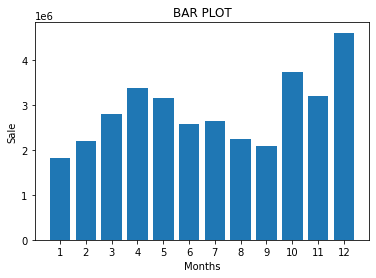

In [79]:
month=range(1,13)
plt.xticks(month)
plt.bar(month,sum['Sale'])
plt.title('BAR PLOT')
plt.xlabel("Months")
plt.ylabel("Sale")
plt.show()

As we can see,December has the highest sales and January has the lowest Sale.

As december is festival month, so sales rise.

## b. At what time of the day would you put out advertisements so that sales increase?

In [80]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,4,99.99
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,600.00
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,11.99
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99


In [81]:
# Extracting hours from time
data['Hour']=data['Time'].str[:2]
#data['Hour']=data['Time'].split(':')
data

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sale,Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,08
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,4,99.99,22
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,600.00,14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,11.99,14
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,09
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",09/17/19,20:56,9,8.97,20
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",09-01-19,16:00,9,700.00,16
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",09/23/19,07:39,9,700.00,07
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",09/19/19,17:30,9,379.99,17


In [82]:
# replacing ':' from the hour column
data['Hour'] = data['Hour'].replace({':':''}, regex=True)

In [83]:
data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sale,Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,08
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,4,99.99,22
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,600.00,14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,11.99,14
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,09
6,176562,USB-C Charging Cable,1,11.95,"381 Wilson St, San Francisco, CA 94016",04/29/19,13:03,4,11.95,13
7,176563,Bose SoundSport Headphones,1,99.99,"668 Center St, Seattle, WA 98101",04-02-19,7:46,4,99.99,7


In [84]:
# converting Hours to integer
data['Hour']=pd.to_numeric(data['Hour'])

In [85]:
# taking sum with respect to hour
sum2 = data.groupby('Hour').sum()
sum2

,Quantity Ordered,Price Each,Month,Sale
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


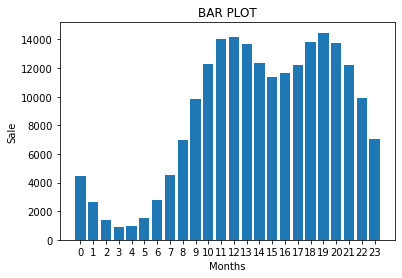

In [87]:
# graph between month and sale of that mont
Hour=range(0,24)
plt.xticks(Hour) 
plt.bar(Hour,sum2['Quantity Ordered'])
plt.title('BAR PLOT')
plt.xlabel("Months")
plt.ylabel("Sale")
plt.show()

From the graph and data provided above, We can see product sale is highest at 12pm and 7pm.

So, before 12pm or around 11:30pm and before 7pm or around 6:30pm we could put out advertisements so that sales increase

## c. What products were sold the most?


In [88]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Month,Sale,Hour
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",04/19/19,08:46,4,23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",04-07-19,22:30,4,99.99,22
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,600.00,14
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",04-12-19,14:38,4,11.99,14
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",04/30/19,09:27,4,11.99,9


In [95]:
# taking sum with respect to product
group_p = data.groupby("Product")
sum3=group_p.sum()
sum3

,Quantity Ordered,Price Each,Month,Sale,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


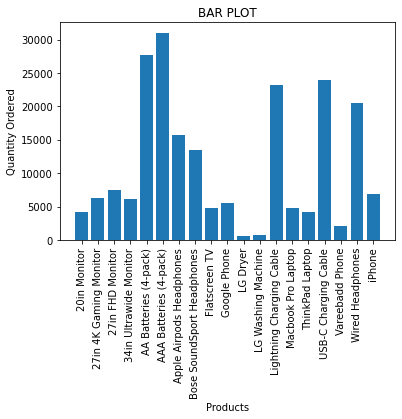

In [105]:
# graph between product and quantity product sold



product = [product for product, df in group_p]
#plt.xticks(product)
plt.bar(product,sum3['Quantity Ordered'])
plt.title('BAR PLOT')
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.xticks(product, rotation='vertical')
plt.show()

From the graph we can observe, AAA Batteries (4-pack) and AA Batteries (4-pack) were sold the most